# <img align="left" style="width: 100px;" src="udea_escudo.png">

# Parcial 1 - Sistemas de Control Continuo - 2024-1
### Juan José Díaz - Kevin Jimenez Rincón
CC. 1001456540 - 1001345384

# Librerías

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import control as ct
from ipywidgets import interact
from scipy.integrate import odeint, solve_ivp
import sympy as smp

#Librerías de Animación
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import PillowWriter
from matplotlib.patches import Circle

# Ejercicio 1 

<img align="center" style="width: 1000px;" src="Ejercicio1.png">

## Ecuaciones del Sistema

$m_{1}\ddot{y_{1}} + k_{1}y_{1} + b(\dot{y_{1}} - \dot{y_{2}}) = u_{1}$ para $m_{1}\\$
$m_{2}\ddot{y_{2}} + k_{2}y_{2} + b(\dot{y_{2}} - \dot{y_{1}}) = u_{2}$ para $m_{2}\\$

## Variables de Estado

$x_{1} = y_{1}\\$
$x_{2} = \dot{y_{1}}\\$
$x_{3} = y_{2}\\$
$x_{4} = \dot{y_{2}}\\$

## Ecuaciones de Estado

$\dot{x_{1}} = x_{2}\\$
$\dot{x_{2}} = \frac{1}{m_{1}}(u_{1} - k_{1}x_{1} - b(x_{2} - x_{4}))\\$
$\dot{x_{3}} = x_{4}\\$
$\dot{x_{4}} = \frac{1}{m_{2}}(u_{2} - k_{2}x_{3} - b(x_{4} - x_{2}))\\$

## Espacio de Estados

$\begin{bmatrix} \dot{x_{1}} \\ \dot{x_{2}} \\ \dot{x_{3}} \\ \dot{x_{4}} \end{bmatrix} = \begin{bmatrix} 0 & 1 & 0 & 0 \\ -\frac{k_{1}}{m_{1}} & -\frac{b}{m_{1}} & 0 & \frac{b}{m_{1}} \\ 0 & 0 & 0 & 1 \\ 0 & \frac{b}{m_{2}} & -\frac{k_{2}}{m_{2}} & -\frac{b}{m_{2}} \end{bmatrix} \begin{bmatrix} x_{1} \\ x_{2} \\ x_{3} \\ x_{4} \end{bmatrix} + \begin{bmatrix} 0 & 0 \\ \frac{1}{m_{1}} & 0 \\ 0 & 0 \\ 0 & \frac{1}{m_{2}} \end{bmatrix} \begin{bmatrix} u_{1} \\ u_{2} \end{bmatrix}$

## Simulación para el Espacio de Estados

En la simulación de este sistema se utiliza la funcion step_response para obtener la respuesta al escalón unitario del espacio de estados. Haciendo que las diferentes entradas del sistema correpondan al escalón.

In [29]:
def ssm1(k1,k2,m1,m2,b):
    # Espacio de estados para el sistema del ejercicio 1
    A = np.array([[0,1,0,0],[-k1/m1,-b/m1,0,b/m1],[0,0,0,1],[0,b/m2,-k2/m2,-b/m2]])
    B = np.array([[0,0],[1/m1,0],[0,0],[0,1/m2]])
    C = np.array([[1,0,0,0],[0,0,1,0]])
    D = np.array([[0,0],[0,0]])
    return(A,B,C,D)   

In [30]:
X0 = [1, 0, 2, 0] # Condición inicial del Sistema [y1(0), y1'(0), y2(0), y2'(0)]

@interact(k1=(0, 10), k2=(0, 10, 1), m1=(1, 10, 1), m2=(1, 10, 1), b=(0, 1, 0.1), tf=(10, 100, 10))

def interactive_plot(k1=5, k2=10, m1=1, m2=5, b=0.3, tf=40):
    
    sys = ct.ss(*ssm1(k1, k2, m1, m2, b)) # Creación del sistema de espacio de estados
    
    time = np.linspace(0, tf, 10000)
    tr, yout = ct.step_response(sys, time, X0) # Respuesta del sistema a una entrada escalón

    y1 = yout[0, 0, :] + yout[0, 1, :]
    y2 = yout[1, 0, :] + yout[1, 1, :]

    fig, axs = plt.subplots(2, 1, figsize=(6, 6))

    # Plot output 1
    axs[0].plot(tr, yout[0, 0, :], label='$y_{1}$ from $u_{1}$')
    axs[0].plot(tr, yout[0, 1, :], label='$y_{1}$ from $u_{2}$')
    axs[0].plot(tr, y1, label='Total $y_{1}$')
    axs[0].set_title('$y_{1}$')
    axs[0].set_xlabel('t(s)')
    axs[0].set_ylabel('Amplitud(m)')
    axs[0].grid()
    axs[0].legend()

    # Plot output 2
    axs[1].plot(tr, yout[1, 0, :], label='$y_{2}$ from $u_{1}$')
    axs[1].plot(tr, yout[1, 1, :], label='$y_{2}$ from $u_{2}$')
    axs[1].plot(tr, y2, label='Total $y_{2}$')
    axs[1].set_title('$y_{2}$')
    axs[1].set_xlabel('t(s)')
    axs[1].set_ylabel('Amplitud(m)')
    axs[1].grid()
    axs[1].legend()

    plt.tight_layout()
    plt.show()


interactive(children=(IntSlider(value=5, description='k1', max=10), IntSlider(value=10, description='k2', max=…

## Animación de la Solución

In [31]:
# Valores de Solución

X0 = [1, 0, 2, 0] # Condiciones iniciales del Sistema [y1(0), y1'(0), y2(0), y2'(0)]

k1 = 5
k2 = 10
m1 = 1
m2 = 2
b = 0.3
tf = 40

sys = ct.ss(*ssm1(k1, k2, m1, m2, b)) # Creación del sistema de espacio de estados

time = np.linspace(0, tf, 1001)
tr, yout = ct.step_response(sys, time, X0) # Respuesta del sistema a una entrada escalón

y1 = yout[0, 0, :] + yout[0, 1, :]
y2 = yout[1, 0, :] + yout[1, 1, :]


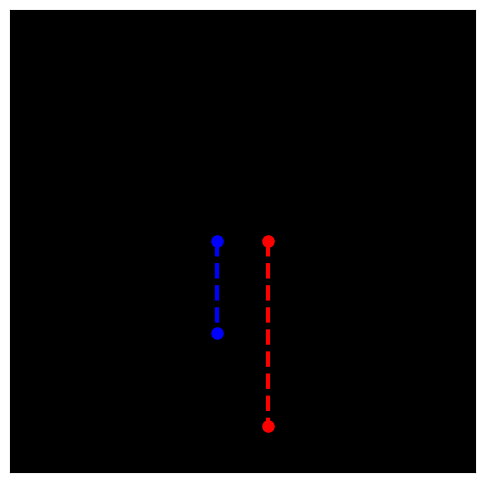

In [32]:
def animate1(i):
    ln1.set_data([0, 0], [0, -y1[i]])
    ln2.set_data([1, 1], [0, -y2[i]])
    
fig, ax = plt.subplots(1,1, figsize=(6,6))
ax.set_facecolor('k')
ax.get_xaxis().set_ticks([])    # enable this to hide x axis ticks
ax.get_yaxis().set_ticks([])    # enable this to hide y axis ticks

ln1, = plt.plot([], [], 'bo--', lw=3, markersize=8)
ln2, = plt.plot([], [], 'ro--', lw=3, markersize=8)

ax.set_ylim(-5,5)
ax.set_xlim(-4,5)

ani1 = animation.FuncAnimation(fig, animate1, frames=1000, interval=50)

ani1.save('Ex1.gif',writer='pillow',fps=25)

# Ejercicio 2

<img align="center" style="width: 1000px;" src="Ejercicio2.png">

## Sistema Polea - Masa - Resorte

### Ecuaciones para la masa en equilibrio estático ($mg - k\delta = 0$)

$\sum{F} = m\ddot{x}  $   →    $m\ddot{x} = mg -T$

$T = ky$   →    $ky = kx + k\delta$

$mg - kx - k\delta = m\ddot{x}$

$m\ddot{x} = -kx$


### Ecuaciones para la polea 

$\sum{\Tau} = J\ddot{\theta}  $   →    $J\ddot{\theta} = TR -kyR$

Reemplazo en la ecuación de la Polea: $T = mg - m\ddot{x}$ y $ky = kx + k\delta$

$J\ddot{\theta} = (mg - m\ddot{x})R + (kx + k\delta)R$

Equilibrio estático: $mg = -k\delta$

$J\ddot{\theta} = -m\ddot{x}R + kxR$


Ecuaciónes de ligadura: $x = R\theta$ y $\ddot{x} = R\ddot{\theta}$

$J\ddot{\theta} = -m\ddot{\theta}R^{2} -k\theta R^{2}$

$J\ddot{\theta} + m\ddot{\theta}R^{2} + k\theta R^{2} = 0$

$(J+ mR^{2})\ddot{\theta} + kR^{2}\theta = 0$

$\ddot{\theta} + \frac{kR^{2}}{J+ mR^{2}}\theta = 0$ →  Frecuencia Natural $w_{n}^{2} = \frac{kR^{2}}{J+ mR^{2}}$


## Variables de Estado

$x_{1} = \theta$

$x_{2} = \dot{\theta}$

## Ecuaciones de Estado

$\dot{x_{1}} = x_{2}$

$\dot{x_{2}} = -\frac{kR^{2}}{J+ mR^{2}}x_{1}$



## Simulación con Odeint

In [14]:
def dXdt(X, t, k, m, R, J):
    x1, x2 = X
    dx1 = x2
    dx2 = (-k*R**2)/(J + m*R**2)*x1
    return [dx1, dx2]

In [15]:
@interact(k=(0, 20, 2), m=(1, 5, 1), R=(1, 5, 1), J=(1, 10, 1), tf=(10, 100, 10))

def interactive_plot( k = 10, m = 1, R = 1, J = 1, tf = 20):

    time = np.linspace(0, tf, 1001)
    X0 = [np.pi/2, 0] # [the(0), the'(0)]
    
    ans = odeint(dXdt, y0 = X0, t=time, args=(k,m,R,J))

    the = ans.T[0] # theta en función del tiempo 

    x = R*the # x en función del tiempo

    
    plt.plot(time, x)
    plt.xlabel('t(s)')
    plt.ylabel('X(t)')
    plt.title('Sistema Masa Polea Resorte en función del tiempo')
    plt.grid()
    plt.show()

interactive(children=(IntSlider(value=10, description='k', max=20, step=2), IntSlider(value=1, description='m'…

## Animación de la Solución

In [35]:
# Parámetros de la Solución

k = 10
m = 1
R = 1
J = 1
tf = 20


time = np.linspace(0, tf, 1001)
X0 = [np.pi/2, 0] # [the(0), the'(0)]

ans = odeint(dXdt, y0 = X0, t=time, args=(k,m,R,J))

the = ans.T[0] # theta en función del tiempo
thet = np.pi/2 + the
xt,yt = R*np.cos(thet), R*np.sin(thet)

x = R*the # x en función del tiempo

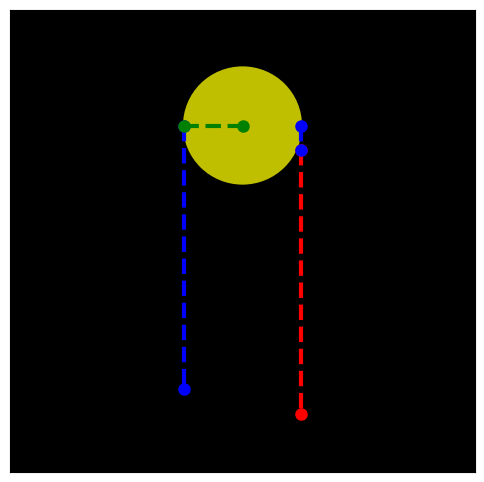

In [36]:
def animate2(i):
    ln1.set_data([-R, -R], [0, -3 -x[i]])
    ln2.set_data([R, R], [x[i] -2 , -5])
    ln3.set_data([R, R], [0, x[i] - 2])
    ln4.set_data([0, xt[i]], [0, yt[i]])

    circle.center = (0, 0)
    
fig, ax = plt.subplots(1,1, figsize=(6,6))
ax.set_facecolor('k')


circle = Circle((0, 0), R, fill=True, facecolor='y', edgecolor='y', lw=2)

ax.get_xaxis().set_ticks([])    # enable this to hide x axis ticks
ax.get_yaxis().set_ticks([])    # enable this to hide y axis ticks
ax.add_patch(circle)

ln1, = plt.plot([], [], 'bo--', lw=3, markersize=8)
ln2, = plt.plot([], [], 'ro--', lw=3, markersize=8)
ln3, = plt.plot([], [], 'bo--', lw=3, markersize=8)
ln4, = plt.plot([], [], 'go--', lw=3, markersize=8)

ax.set_ylim(-6,2)
ax.set_xlim(-4,4)

ani1 = animation.FuncAnimation(fig, animate2, frames=1000, interval=50)

ani1.save('Ex2.gif',writer='pillow',fps=50)

# Ejercicio 3 

<img align="center" style="width: 1000px;" src="Ejercicio3.png">

## Péndulo Doble Ecuaciones del Sistema → 2 Grados de Libertad

$\textbf{Momentos de Inercia de cada Péndulo}$ → $J_{i} = m_{i}l_{i}^2$


### Posición

$x_{1} = l_{1}sen(\theta_{1})\\$
$y_{1} = -l_{1}cos(\theta_{1})\\$
$x_{2} = l_{1}sen(\theta_{1}) + l_{2}sen(\theta_{2})\\$
$y_{2} = -l_{1}cos(\theta_{1}) - l_{2}cos(\theta_{2})\\$

### Velocidad

$\dot{x_{1}} = l_{1}cos(\theta_{1})\dot{\theta_{1}}\\$
$\dot{y_{1}} = l_{1}sen(\theta_{1})\dot{\theta_{1}}\\$
$\dot{x_{2}} = l_{1}cos(\theta_{1})\dot{\theta_{1}} + l_{2}cos(\theta_{2})\dot{\theta_{2}}\\$
$\dot{y_{2}} = l_{1}sen(\theta_{1})\dot{\theta_{1}} + l_{2}sen(\theta_{2})\dot{\theta_{2}}\\$


### Energía Potencial

$V = m_{1}gy_{1} + m_{2}gy_{2} = m_{1}g(-l_{1}cos(\theta_{1})) + m_{2}g(-l_{1}cos(\theta_{1}) - l_{2}cos(\theta_{2}))\\$

### Energía Cinética

$T = \frac{1}{2}m_{1}v_{1}^2 + \frac{1}{2}m_{2}v_{2}^2 + \frac{1}{2}J_{1}\dot{\theta_{1}}^2 + \frac{1}{2}J_{2}\dot{\theta_{2}}^2 = \frac{1}{2}m_{1}(\dot{x_{1}}^2 + \dot{y_{1}}^2) + \frac{1}{2}m_{2}(\dot{x_{2}}^2 + \dot{y_{2}}^2) + \frac{1}{2}m_{1}l_{1}^2\dot{\theta_{1}}^2 + \frac{1}{2}m_{2}l_{2}^2\dot{\theta_{2}}^2\\$

<br>

Y usando las siguientes identidades trigonométricas:

$cos(\theta_{1} - \theta_{2}) = cos(\theta_{1})cos(\theta_{2}) + sen(\theta_{1})sen(\theta_{2})\\$
$cos^{2}(\theta) + sen^{2}(\theta) = 1 \\$

Se obtiene la siguiente ecuación de energía cinética:

$T = m_{1}l_{1}^2\dot{\theta_{1}}^2 + m_{2}l_{2}^2\dot{\theta_{2}}^2 + \frac{1}{2}m_{2}l_{1}^2\dot{\theta_{1}}^2 + m_{2}l_{1}l_{2}\dot{\theta_{1}}\dot{\theta_{2}}cos(\theta_{1}-\theta_{2})$

<br>

## Lagrangiano

<div style="border: 2px solid white; padding: 10px; width: 90%;">

$L = T - V = m_{1}l_{1}^2\dot{\theta_{1}}^2 + m_{2}l_{2}^2\dot{\theta_{2}}^2 + \frac{1}{2}m_{2}l_{1}^2\dot{\theta_{1}}^2 + m_{2}l_{1}l_{2}\dot{\theta_{1}}\dot{\theta_{2}}cos(\theta_{1}-\theta_{2}) + (m_{1} + m_{2})gl_{1}cos(\theta_{1}) + m_{2}g(l_{2}cos(\theta_{2}))\\$

</div>

### Ecuaciones de Euler-Lagrange

$\frac{d}{dt}(\frac{\partial L}{\partial \dot{q_{i}}}) - \frac{\partial L}{\partial q_{i}} + \frac{\partial P}{\partial \dot{q_{i}}}= Q_{i}\\$

$\frac{\partial P}{\partial \dot{q_{i}}} = 0$ → No existen fuerzas disipativas

$Q_{i} = 0$ → No existen fuerzas externas

$\frac{d}{dt}(\frac{\partial L}{\partial \dot{q_{i}}}) - \frac{\partial L}{\partial q_{i}} = 0\\$

### Para $\theta_{1}$ 

$\frac{d}{dt}(\frac{\partial L}{\partial \dot{\theta_{1}}}) - \frac{\partial L}{\partial \theta_{1}} = 0\\$

$\frac{\partial L}{\partial \dot{\theta_{1}}} = 2m_{1}l_{1}^2\dot{\theta_{1}} + m_{2}l_{1}^2\dot{\theta_{1}} + m_{2}l_{1}l_{2}\dot{\theta_{2}}cos(\theta_{1}-\theta_{2})\\$

$\frac{d}{dt}(\frac{\partial L}{\partial \dot{\theta_{1}}}) = (2m_{1}+m_{2})l_{1}^2\ddot{\theta_{1}} + m_{2}l_{1}l_{2}\ddot{\theta_{2}}cos(\theta_{1}-\theta_{2}) - m_{2}l_{1}l_{2}\dot{\theta_{2}}sen(\theta_{1}-\theta_{2})(\dot{\theta_{1}} - \dot{\theta_{2}})\\$

$\frac{\partial L}{\partial \theta_{1}} = -m_{2}l_{1}l_{2}\dot{\theta_{1}}\dot{\theta_{2}}sen(\theta_{1}-\theta_{2}) - (m_{1} + m_{2})gl_{1}sen(\theta_{1})\\$

Ecuación de Langrange para $\theta_{1}\\$ 

<div style="border: 2px solid white; padding: 10px; width: 65%;">

$(2m_{1}+m_{2})l_{1}\ddot{\theta_{1}} + m_{2}l_{2}\ddot{\theta_{2}}cos(\theta_{1}-\theta_{2}) + m_{2}l_{2}\dot{\theta_{2}}^2sen(\theta_{1}-\theta_{2}) + (m_{1} + m_{2})gl_{1}sen(\theta_{1}) = 0\\$

</div>

### Para $\theta_{2}$

$\frac{d}{dt}(\frac{\partial L}{\partial \dot{\theta_{2}}}) - \frac{\partial L}{\partial \theta_{2}} = 0\\$

$\frac{\partial L}{\partial \dot{\theta_{2}}} = 2m_{2}l_{2}^2\dot{\theta_{2}} + m_{2}l_{1}l_{2}\dot{\theta_{1}}cos(\theta_{1}-\theta_{2})\\$

$\frac{d}{dt}(\frac{\partial L}{\partial \dot{\theta_{2}}}) = 2m_{2}l_{2}^2\ddot{\theta_{2}} + m_{2}l_{1}l_{2}\ddot{\theta_{1}}cos(\theta_{1}-\theta_{2}) - m_{2}l_{1}l_{2}\dot{\theta_{1}}sen(\theta_{1}-\theta_{2})(\dot{\theta_{1}} - \dot{\theta_{2}})\\$

$\frac{\partial L}{\partial \theta_{2}} = m_{2}l_{1}l_{2}\dot{\theta_{1}}\dot{\theta_{2}}sen(\theta_{1}-\theta_{2}) - m_{2}gl_{2}sen(\theta_{2})\\$

Ecuación de Langrange para $\theta_{2}\\$

<div style="border: 2px solid white; padding: 10px; width: 60%;">

$2m_{2}l_{2}\ddot{\theta_{2}} + m_{2}l_{1}\ddot{\theta_{1}}cos(\theta_{1}-\theta_{2}) - m_{2}l_{1}\dot{\theta_{1}}^2sen(\theta_{1}-\theta_{2}) + m_{2}gsen(\theta_{2}) = 0\\$

</div>

## Variables de Estado  

$x_{1} = \theta_{1}\\$
$x_{2} = \dot{\theta_{1}}\\$
$x_{3} = \theta_{2}\\$
$x_{4} = \dot{\theta_{2}}\\$

## Ecuaciones de Estado

$\dot{x_{1}} = x_{2}\\$

$\dot{x_{2}} = - \frac{m_{2}l_{2}}{(2m_{1}+m_{2})l_{1}}\dot{x_{4}}cos(x_{1}-x_{3}) - \frac{m_{2}l_{2}}{(2m_{1}+m_{2})l_{1}}x_{4}^2sen(x_{1}-x_{3}) - \frac{m_{1}+m_{2}}{(2m_{1}+m_{2})l_{1}}gsen(x_{1})\\$

$\dot{x_{3}} = x_{4}\\$

$\dot{x_{4}} = -\frac{l_{1}}{2l_{2}}\dot{x_{2}}cos(x_{1}-x_{3}) + \frac{l_{1}}{2l_{2}}x_{2}^2sen(x_{1}-x_{3}) - \frac{g}{2l_{2}}sen(x_{3})\\$


## Simulación con Variables Simbólicas Usando Sympy

In [37]:
t, g = smp.symbols('t g')
m1, m2 = smp.symbols('m1 m2')
l1, l2 = smp.symbols('l1, l2')

$\theta_{1}$ y $\theta_{2}$ dependen de otra variable simbólica $t$ por lo que se definen de la siguiente manera:

In [38]:
the1, the2 = smp.symbols(r'\theta_1, \theta_2', cls=smp.Function)

the1 = the1(t)
the2 = the2(t)

Definicición de las derivadas del tiempo de $\theta_{1}$ y $\theta_{2}$

In [39]:
the1_d = smp.diff(the1, t)
the2_d = smp.diff(the2, t)
the1_dd = smp.diff(the1_d, t)
the2_dd = smp.diff(the2_d, t)

Ecuaciones de posición del sistema: $x_{1}$, $y_{1}$, $x_{2}$, $y_{2}$

In [40]:
x1 = l1*smp.sin(the1)
y1 = -l1*smp.cos(the1)
x2 = l1*smp.sin(the1)+l2*smp.sin(the2)
y2 = -l1*smp.cos(the1)-l2*smp.cos(the2)

Ecuaciones de Energía Potencial y Cinética

In [41]:
# Cinética
T1 = 1/2 * m1 * (smp.diff(x1, t)**2 + smp.diff(y1, t)**2)
T2 = 1/2 * m2 * (smp.diff(x2, t)**2 + smp.diff(y2, t)**2)
T3 = 1/2 *m1 * l1**2 * the1_d**2
T4 = 1/2 *m2 * l2**2 * the2_d**2
T = T1+T2+T3+T4

# Potencial
V1 = m1 * g * y1
V2 = m2 * g * y2

# Lagrangiano
L = T - V1 - V2

In [42]:
L

g*l1*m1*cos(\theta_1(t)) - g*m2*(-l1*cos(\theta_1(t)) - l2*cos(\theta_2(t))) + 0.5*l1**2*m1*Derivative(\theta_1(t), t)**2 + 0.5*l2**2*m2*Derivative(\theta_2(t), t)**2 + 0.5*m1*(l1**2*sin(\theta_1(t))**2*Derivative(\theta_1(t), t)**2 + l1**2*cos(\theta_1(t))**2*Derivative(\theta_1(t), t)**2) + 0.5*m2*((l1*sin(\theta_1(t))*Derivative(\theta_1(t), t) + l2*sin(\theta_2(t))*Derivative(\theta_2(t), t))**2 + (l1*cos(\theta_1(t))*Derivative(\theta_1(t), t) + l2*cos(\theta_2(t))*Derivative(\theta_2(t), t))**2)

Ecuaciones de Lagrange

In [43]:
LE1 = smp.diff(L, the1) - smp.diff(smp.diff(L, the1_d), t).simplify()
LE2 = smp.diff(L, the2) - smp.diff(smp.diff(L, the2_d), t).simplify()

Despejar las ecuaciones de Lagrange para $\ddot{\theta_{1}}$ y $\ddot{\theta_{2}}$ con LE1 y LE2 = 0

In [44]:
sols = smp.solve([LE1, LE2], (the1_dd, the2_dd),
                simplify=False, rational=False)

Definir las ecuaciones de estado del sistema y convertir las expresiones simbólicas en funciones mediante `smp.lambdify`

$\dot{x_{1}} = x_{2}\\$

$\dot{x_{2}} = - \frac{m_{2}l_{2}}{(2m_{1}+m_{2})l_{1}}\dot{x_{4}}cos(x_{1}-x_{3}) - \frac{m_{2}l_{2}}{(2m_{1}+m_{2})l_{1}}x_{4}^2sen(x_{1}-x_{3}) - \frac{m_{1}+m_{2}}{(2m_{1}+m_{2})l_{1}}gsen(x_{1})\\$

$\dot{x_{3}} = x_{4}\\$

$\dot{x_{4}} = -\frac{l_{1}}{2l_{2}}\dot{x_{2}}cos(x_{1}-x_{3}) + \frac{l_{1}}{2l_{2}}x_{2}^2sen(x_{1}-x_{3}) - \frac{g}{2l_{2}}sen(x_{3})\\$

In [45]:
dx1 = smp.lambdify(the1_d, the1_d)
dx2 = smp.lambdify((t,g,m1,m2,l1,l2,the1,the2,the1_d,the2_d), sols[the1_dd])
dx3 = smp.lambdify(the2_d, the2_d)
dx4 = smp.lambdify((t,g,m1,m2,l1,l2,the1,the2,the1_d,the2_d), sols[the2_dd])

Definir el sistema de ecuaciones diferenciales de Primer Orden

In [46]:
def dSdt(S, t, g, m1, m2, l1, l2):
    the1, z1, the2, z2 = S
    return [
        dx1(z1),
        dx2(t, g, m1, m2, l1, l2, the1, the2, z1, z2),
        dx3(z2),
        dx4(t, g, m1, m2, l1, l2, the1, the2, z1, z2),
    ]

Función para obtener las Posiciones (X,Y) de las masas $m{1}$ y $m{2}$ usando $\theta$ y l

In [47]:
def pol2rect(the1, the2, l1, l2):
    x1 = l1*np.sin(the1)
    y1 = -l1*np.cos(the1)
    x2 = l1*np.sin(the1) + l2*np.sin(the2)
    y2 = -l1*np.cos(the1) - l2*np.cos(the2)
    return (x1, y1, x2, y2)

Solución interactiva

In [48]:
@interact(l1=(0, 5, 1), l2=(0, 5, 1), m1=(1, 10, 1), m2=(1, 10, 1), g=(1, 10, 1), tf=(10, 100, 10))

def interactive_plot( l1 = 4, l2 = 1, m1=2, m2=10, g = 9.81, tf = 40):

    time = np.linspace(0, tf, 1001)
    X0 = [1, -3, -1, 5] # [the1, z1, the2, z2]
    
    ans = odeint(dSdt, y0 = X0, t=time, args=(g,m1,m2,l1,l2))

    the1 = ans.T[0] # theta1 en función del tiempo → ans.T[1] y ans.T[3] son las velocidades angulares
    the2 = ans.T[2] # theta2 en función del tiempo 

    x1, y1, x2, y2 = pol2rect(the1,the2, l1, l2)

    
    
    plt.plot(x1, y1, label='Péndulo 1')
    plt.plot(x2, y2, label='Péndulo 2')
    plt.legend()
    plt.xlim(-6,6)
    plt.ylim(-6,6)
    plt.xlabel('X(t)')
    plt.ylabel('Y(t)')
    plt.title('Posiciones de las masas $m_1$ y $m_2$ en función del tiempo')
    plt.grid()
    plt.show()


interactive(children=(IntSlider(value=4, description='l1', max=5), IntSlider(value=1, description='l2', max=5)…

## Animación de la Respuesta del Sistema


In [49]:
# Parámetros de la solución
g = 9.81
m1=2
m2=1
l1 = 2
l2 = 1
tf = 40

#Cálculo con Odeint

time = np.linspace(0, tf, 1001)
X0 = [1, -3, -1, 5] # [the1, z1, the2, z2]
ans = odeint(dSdt, y0 = X0, t=time, args=(g,m1,m2,l1,l2))

the1 = ans.T[0] # theta1 en función del tiempo → ans.T[1] y ans.T[3] son las velocidades angulares
the2 = ans.T[2] # theta2 en función del tiempo 

x1, y1, x2, y2 = pol2rect(the1,the2, l1, l2)

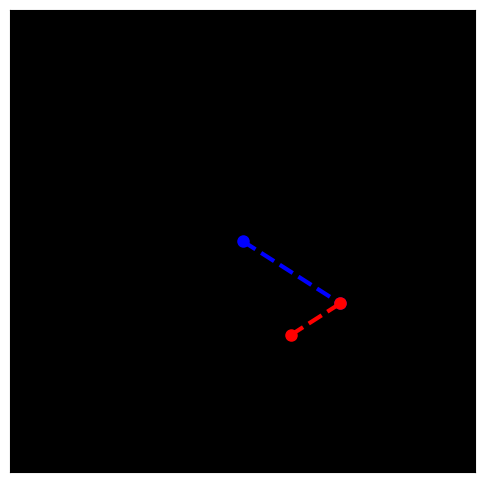

In [50]:
def animate3(i):
    ln1.set_data([0, x1[i]], [0, y1[i]])
    ln2.set_data([x1[i], x2[i]], [y1[i], y2[i]])
    
fig, ax = plt.subplots(1,1, figsize=(6,6))
ax.set_facecolor('k')
ax.get_xaxis().set_ticks([])    # enable this to hide x axis ticks
ax.get_yaxis().set_ticks([])    # enable this to hide y axis ticks
ln1, = plt.plot([], [], 'bo--', lw=3, markersize=8)
ln2, = plt.plot([], [], 'ro--', lw=3, markersize=8)
ax.set_ylim(-4,4)
ax.set_xlim(-4,4)
ani = animation.FuncAnimation(fig, animate3, frames=1000, interval=50)
ani.save('Ex3.gif',writer='pillow',fps=25)

# Ejercicio 4

<img align="center" style="width: 1000px;" src="Ejercicio4.png">

## Condicion Inicial:

<img align="center" style="width: 400px;" src="prev.png">

$i(0) = i(0^{-}) = i(0^{+})\\$

$i(0^{-}) = \frac{E}{R_{1}+R_{2}} = i(0)$

## Solución para t ≥ 0: Ley de Mallas

$-E + L\frac{di(t)}{dt} + i(t)R_{1} = 0 $    &nbsp;&nbsp;&nbsp;    → $L\frac{di(t)}{dt} = E - i(t)R_{1}\\$

$\frac{di(t)}{dt} = -\frac{R_{1}}{L}(i(t) - \frac{E}{R_{1}})\\$

$\int_{i(0)}^{i(t)} \frac{di(t)}{i -\frac{E}{R_{1}}} = -\frac{R_{1}}{L}\int_{0}^{t} dt\\$

## Solución de la Ecuación Diferencial

$ln(i(t) - \frac{E}{R_{1}}) - ln(i(0) - \frac{E}{R_{1}}) = -\frac{R_{1}}{L}t\\$

$ln(\frac{i(t) - \frac{E}{R_{1}}}{i(0) - \frac{E}{R_{1}}}) = -\frac{R_{1}}{L}t\\$

$i(t) = i(0)e^{-\frac{R_{1}}{L}t} + \frac{E}{R_{1}}(1 - e^{-\frac{R_{1}}{L}t})$ → Reemplazando $i(0)\\$


<div style="border: 2px solid white; padding: 10px; width: 20%;">

$i(t) = E\frac{R_{2}}{R_{1}}(\frac{1}{R_{2}} - \frac{e^-{\frac{R_{1}}{L}}t}{R_{1} + R_{2}})$

</div>



## Simulación

Al resolver la ecuación diferencial, se obtiene la respuesta del sistema para t≥0 de manera analítica, por lo que la simulación consiste únicamente en trazar el gráfico de la respuesta temporal del sistema.

$R_{1}$ y $R_{2}$ oscilan entre 100 $\Omega$ y 10K $\Omega$ 

$L$ oscila entre 1 y 10 mH 

$E$ oscila entre 1 y 10 V

$t$ oscila entre 10 y 100 $\mu$ s

In [51]:
@interact(E=(0, 10), R1=(100, 10000, 100), R2=(100, 10000, 100), L=(10, 100, 10 ), tf=(10, 100, 10))

def interactive_plot(E=1, R1=100, R2=100, L=1, tf=1):
    time = np.linspace(0, tf, 1000)
    i = E * R2 / R1 * (1 / R2 - np.exp((-R1 / (L/10000)) * (time/1000000)) / (R1 + R2))
    
    plt.plot(time, i)
    plt.xlabel('Time($\mu$s)')
    plt.ylabel('i(t)')
    plt.title('Respuesta temporal i(t)')
    plt.grid()
    plt.show()


interactive(children=(IntSlider(value=1, description='E', max=10), IntSlider(value=100, description='R1', max=…

# Ejercicio 5

<img align="center" style="width: 1000px;" src="Ejercicio5.png">

## Ecuaciones del Sistema - Ley de Kirchhoff de Voltajes

$-E + L(\ddot{q_{1}}-\ddot{q_{3}}) + \frac{q_{1}-q_{2}}{C_{1}} = 0$

$\frac{q_{2}-q_{1}}{C_{1}} + R(\dot{q_{2}}-\dot{q_{3}}) + R\dot{q_{2}} = 0$

$\frac{q_{3}}{C_{2}} + L(\ddot{q_{3}} - \ddot{q_{1}}) + R(\dot{q_{3}} - \dot{q_{2}}) = 0$

$-E + \frac{q_{3}}{C_{2}} + R\dot{q_{2}} = 0$


## Despejar las Ecuaciones del Sistema

$\ddot{q_{1}} = \frac{1}{L}(E + \frac{q_{2}-q_{1}}{C_{1}}) + \ddot{q_{3}}$

$\dot{q_{2}} = \frac{q_{1}-q_{2}}{2RC_{1}} + \frac{\dot{q_{3}}}{2}$

$\ddot{q_{3}} = \ddot{q_{1}} -\frac{\dot{q_{3}}}{LC_{2}} + \frac{R}{L}(\dot{q_{2}} - \dot{q_{3}})$

## Despejado en Variables de Estado

$x_{1} = q_{1}$

$x_{2} = \dot{q_{1}}$

$x_{3} = q_{2}$


$x_{4} = q_{3}$

$x_{5} = \dot{q_{3}}$

## Ecuaciones de Estado

$\dot{x_{1}} = x_{2}$

$\dot{x_{2}} = \frac{1}{L}(E - \frac{x_{3}-x_{1}}{C_{1}}) +\dot{x_{5}}$

$\dot{x_{3}} = \frac{x_{1} - x_{3}}{2RC_{1}} + \frac{{x_{5}}}{2}$

$\dot{x_{4}} = x_{5}$

$\dot{x_{5}} = \dot{x_{2}} + \frac{R}{L}(\dot{x_{3}} - x_{5}) - \frac{x_{5}}{LC_{2}}$


## Solución con Métodos Numéricos 



In [52]:
# Para Runge Kutta y Odeint

def dXdt(x, t, C1, C2, L, R, E):
  dx = np.zeros((5,))
  dx[0] = x[1]
  dx[1] = (1/L)* (E + (x[2] - x[0])/C1) + dx[4]
  dx[2] = x[4]/2 + (x[0] - x[2])/(2*R*C1)
  dx[3] = x[4]
  dx[4] = dx[1] + (R/L)*(dx[2] - x[4]) - (x[3])/(L*C2)
  return dx

In [53]:
#Para solve_ivp

def dXdt2(t, x, C1, C2, L, R, E):
  dx = np.zeros((5,))
  dx[0] = x[1]
  dx[1] = (1/L)* (E + (x[2] - x[0])/C1) + dx[4]
  dx[2] = x[4]/2 + (x[0] - x[2])/(2*R*C1)
  dx[3] = x[4]
  dx[4] = dx[1] + (R/L)*(dx[2] - x[4]) - (x[3])/(L*C2)
  return dx

In [54]:
def runge_kutta_step(f, x, t, dt, *args):
    k1 = f(x, t, *args)
    k2 = f(x + 0.5*dt*k1, t + 0.5*dt, *args)
    k3 = f(x + 0.5*dt*k2, t + 0.5*dt, *args)
    k4 = f(x + dt*k3, t + dt, *args)
    return x + (dt/6.0) * (k1 + 2*k2 + 2*k3 + k4)

def solve_runge_kutta(f, x0, t, dt, *args):
    num_steps = len(t)
    num_vars = len(x0)
    x = np.zeros((num_steps, num_vars))
    x[0] = x0
    for i in range(1, num_steps):
        x[i] = runge_kutta_step(f, x[i-1], t[i-1], dt, *args)
    return x

In [55]:
@interact(R=(1, 10, 1), C1=(10, 100, 10), C2=(10, 100, 1), L=(1, 10, 1), E=(1, 10, 1), tf=(1, 10, 1))

def interactive_plot( R = 1, C1 = 10, C2 = 10, L = 1, E = 5, tf = 1):

    R = 1000*R
    C1 = C1/(10**6)
    C2 = C2/(10**6)
    L = L
    tf = tf/10
    
    t = np.linspace(0, tf, 100001)
    ts = t[:-1]
    ts1 = ts[:-1]

    dt = t[1] - t[0]


    X0 = [0, 0, 0, 0, 0] # [q1, q1', q2, q3, q3']
    
    #ans = solve_runge_kutta(dXdt, X0, t, dt, C1, C2, L, R, E)
    ans = odeint(dXdt, X0, t, args=(C1, C2, L, R, E))
    #ans = solve_ivp(dXdt2, (0, tf), X0, args=(C1, C2, L, R, E), t_eval=t)

    # Descomentar para solve_ivp

    #q1 = ans.y[0]
    #q2 = ans.y[2]
    #q3 = ans.y[3]

    q1 = ans.T[0]
    q2 = ans.T[2]
    q3 = ans.T[3]

    i1 = np.diff(q1)/np.diff(t) 
    i2 = np.diff(q2)/np.diff(t)
    i3 = np.diff(q3)/np.diff(t)

    #Se integra numéricamente la corriente para el voltaje en el capacitor

    Vc1 = np.cumsum(((i1-i2)/C1)*np.diff(t))
    Vc2 = np.cumsum(((i3)/C2)*np.diff(t))
    Vl = L*(np.diff(i1-i3)/np.diff(ts))

    fig, axs = plt.subplots(3, 2, figsize=(8, 8))
    
    # Corriente 1
    axs[0][0].plot(ts, i1)
    axs[0][0].set_title('$i_{1}$')
    axs[0][0].set_xlabel('t(s)')
    axs[0][0].set_ylabel('Corriente(A)')
    axs[0][0].grid()

    # Corriente 2
    axs[1][0].plot(ts, i2)
    axs[1][0].set_title('$i_{2}$')
    axs[1][0].set_xlabel('t(s)')
    axs[1][0].set_ylabel('Corriente(A)')
    axs[1][0].grid()

    # Corriente 3
    axs[2][0].plot(ts, i3)
    axs[2][0].set_title('$i_{3}$')
    axs[2][0].set_xlabel('t(s)')
    axs[2][0].set_ylabel('Corriente(A)')
    axs[2][0].grid()

    # Voltaje en el capacitor 1
    axs[0][1].plot(ts, Vc1)
    axs[0][1].set_title('$VC_{1}$')
    axs[0][1].set_xlabel('t(s)')
    axs[0][1].set_ylabel('Voltaje(V)')
    axs[0][1].grid()

    # Voltaje en el Capacitor 2
    axs[1][1].plot(ts, Vc2)
    axs[1][1].set_title('$VC_{2}$')
    axs[1][1].set_xlabel('t(s)')
    axs[1][1].set_ylabel('Voltaje(V)')
    axs[1][1].grid()

    # Voltaje en el inductor
    axs[2][1].plot(ts1, Vl)
    axs[2][1].set_title('$V_{L}$')
    axs[2][1].set_xlabel('t(s)')
    axs[2][1].set_ylabel('Voltaje(V)')
    axs[2][1].grid()

    plt.tight_layout()
    plt.show()

interactive(children=(IntSlider(value=1, description='R', max=10, min=1), IntSlider(value=10, description='C1'…

# Ejercicio 6

<img align="center" style="width: 1000px;" src="Ejercicio6.png"> 

## Sistema de Péndulo Elástico 

### Relación de la posición de la masa

$l(t) = l_{o} + x(t)\\$

El movimiento de la masa m se puede definir mediant sus vectores tangencial y normal del movimiento pendular: $ê_{r}$ y $ê_{\theta}$

$v(t)^2 = v_{r}^2 + v_{\theta}^2$

### Ecuaciones de Energía

#### Energía Potencial

$V = -mglcos(\theta) + \frac{1}{2}kx^2 = -mg(l_{o} + x)cos(\theta) + \frac{1}{2}kx^2 $

#### Energía Cinética

$T = \frac{1}{2}mv^2 = \frac{1}{2}m(v_{r}^2 + v_{\theta}^2) = \frac{1}{2}m(\dot{x}^2 + (l\dot{\theta}^2))$

$T = \frac{1}{2}m(\dot{x}^2 + (l_{o} + x)^2\dot{\theta}^2)$

### Lagrangiano

$L = T - V = \frac{1}{2}m(\dot{x}^2 + (l_{o} + x)^2\dot{\theta}^2) + mg(l_{o} + x)cos(\theta) - \frac{1}{2}kx^2$

### Ecuaciones de Euler-Lagrange

$\frac{d}{dt}(\frac{\partial L}{\partial \dot{q_{i}}}) - \frac{\partial L}{\partial q_{i}} + \frac{\partial P}{\partial \dot{q_{i}}}= Q_{i}\\$

$\frac{\partial P}{\partial \dot{q_{i}}} = 0$ → No existen fuerzas disipativas

$Q_{i} = 0$ → No existen fuerzas externas

$\frac{d}{dt}(\frac{\partial L}{\partial \dot{q_{i}}}) - \frac{\partial L}{\partial q_{i}} = 0\\$

Para x

$\frac{d}{dt}(\frac{\partial L}{\partial \dot{x}}) - \frac{\partial L}{\partial x} = 0\\$

$\frac{\partial L}{\partial \dot{x}} = m\dot{x}\\$

$\frac{d}{dt}(\frac{\partial L}{\partial \dot{x}}) = m\ddot{x}\\$

$\frac{\partial L}{\partial x} = m(l_{o} + x)\dot{\theta}^2 +mgcos(\theta) - kx$

Ecuación de Lagrange para x

$m\ddot{x} - m(l_{o} + x)\dot{\theta}^2 - mgcos(\theta) + kx = 0$

Para $\theta$

$\frac{d}{dt}(\frac{\partial L}{\partial \dot{\theta}}) - \frac{\partial L}{\partial \theta} = 0\\$

$\frac{\partial L}{\partial \dot{\theta}} = m(l_{o} + x)^2\dot{\theta}\\$

$\frac{d}{dt}(\frac{\partial L}{\partial \dot{\theta}}) = m(l_{o} + x)^2\ddot{\theta} + 2m(l_{o} + x)\dot{x}\dot{\theta}$

$\frac{\partial L}{\partial \theta} = -mg(l_{o} + x)sen(\theta)$

Ecuación de Lagrange para $\theta$

$m(l_{o} + x)^2\ddot{\theta} + 2m(l_{o} + x)\dot{x}\dot{\theta} + mg(l_{o} + x)sen(\theta) = 0$

$(l_{o} + x)^2\ddot{\theta} + 2(l_{o} + x)\dot{x}\dot{\theta} + g(l_{o} + x)sen(\theta) = 0$

### Variables de Estado

$x_{1} = x\\$
$x_{2} = \dot{x}\\$
$x_{3} = \theta\\$
$x_{4} = \dot{\theta}\\$

### Ecuaciones de Estado

$\dot{x_{1}} = x_{2}\\$

$\dot{x_{2}} = (l_{o} + x_{1})\dot{x_{4}}^2 + gcos(x_{3}) - \frac{k}{m}x_{1}\\$

$\dot{x_{3}} = x_{4}\\$

$\dot{x_{4}} = -2\frac{x_{2}x_{4}}{l_{0}+x_{1}} - \frac{g}{l_{0}+x_{1}}sen(x_{3})$





## Simulación con Variables Simbólicas Usando Sympy


In [2]:
t, g = smp.symbols('t g')
m = smp.symbols('m')
k = smp.symbols('k')
lo = smp.symbols('lo')

x y $\theta$ dependen de otra variable simbólica $t$ por lo que se definen de la siguiente manera:

In [3]:
x = smp.symbols('x', cls=smp.Function)
x = x(t)

the = smp.symbols(r'\theta', cls=smp.Function)
the = the(t)

Primeras y segundas derivadas del tiempo de x y $\theta$



In [4]:
x_d = smp.diff(x, t)
x_dd = smp.diff(x_d, t)

the_d = smp.diff(the, t)
the_dd = smp.diff(the_d, t)

Ecuaciones de energía potencial y cinética

In [5]:
# Cinética
T1 = 1/2 * m * x_d**2 
T2 = 1/2 * m * (lo + x)**2 * the_d**2
T = T1 + T2

# Potencial
V1 = -m * g * (lo + x) * smp.cos(the)
V2 = 1/2 *k*x**2
V = V1 + V2

# Lagrangiano
L = T - V

In [6]:
L

g*m*(lo + x(t))*cos(\theta(t)) - 0.5*k*x(t)**2 + 0.5*m*(lo + x(t))**2*Derivative(\theta(t), t)**2 + 0.5*m*Derivative(x(t), t)**2

Ecuaciones de Lagrange

In [7]:
LE1 = smp.diff(L, x) - smp.diff(smp.diff(L, x_d), t).simplify()
LE2 = smp.diff(L, the) - smp.diff(smp.diff(L, the_d), t).simplify()

Despejar las de las ecuaciones de Lagrange para $\ddot{x}$ y $\ddot{\theta}$ con LE1 y LE2 = 0

In [8]:
sols = smp.solve([LE1, LE2], (x_dd, the_dd),
                simplify=False, rational=False)

In [9]:
sols[x_dd]

1.0*g*cos(\theta(t)) - 1.0*k*x(t)/m + 1.0*lo*Derivative(\theta(t), t)**2 + 1.0*x(t)*Derivative(\theta(t), t)**2

Escribir las ecuaciones de estado del sistema y conversión de las expresiones simbólicas en funciones mediante `smp.lambdify`

$\dot{x_{1}} = x_{2}\\$

$\dot{x_{2}} = (l_{o} + x_{1})\dot{x_{4}}^2 + gcos(x_{3}) - \frac{k}{m}x_{1}\\$

$\dot{x_{3}} = x_{4}\\$

$\dot{x_{4}} = -2\frac{x_{2}x_{4}}{l_{0}+x_{1}} - \frac{g}{l_{0}+x_{1}}sen(x_{3})$



In [10]:
dx1 = smp.lambdify(x_d, x_d)
dx2 = smp.lambdify((t,g,m,lo,k,x,x_d,the,the_d), sols[x_dd])
dx3 = smp.lambdify(the_d, the_d)
dx4 = smp.lambdify((t,g,m,lo,k,x,x_d,the,the_d), sols[the_dd])

Sistema de ecuaciones diferenciales de Primer Orden

In [11]:
def dXdt(S, t, g, m, lo, k):
    x, z1, the, z2 = S
    return [
        dx1(z1),
        dx2(t, g, m, lo, k, x, z1, the, z2),
        dx3(z2),
        dx4(t, g, m, lo, k, x, z1, the, z2),
    ]

Hallar las posiciones (X,Y) de las masa $m$ usando $\theta$ y l

In [12]:
def pol2rect(the, lo, x):
    l = lo + x
    x = l*np.sin(the)
    y = -l*np.cos(the)
    return (x,y)

Solución interactiva del Sistema

In [13]:
@interact(k=(1, 10, 1), lo=(0, 5, 1), m=(1, 10, 1), g=(1, 10, 1), tf=(10, 1000, 100))

def interactive_plot( k = 10, lo = 1, m=2, g = 9.81, tf = 40):

    time = np.linspace(0, tf, 1001)
    X0 = [0, 0, 45/180*np.pi, 0.1] # [x, z1, the, z2]
    
    ans = odeint(dXdt, y0 = X0, t=time, args=(g,lo,m,k))

    x = ans.T[0] # theta1 en función del tiempo → ans.T[1] y ans.T[3] son las velocidades angulares
    the = ans.T[2] # theta2 en función del tiempo 

    x, y= pol2rect(the, lo, x)

    
    plt.plot(x, y)
    plt.xlabel('X(t)')
    plt.ylabel('Y(t)')
    plt.title('Péndulo Elástico en función del tiempo')
    plt.grid()
    plt.show()

interactive(children=(IntSlider(value=10, description='k', max=10, min=1), IntSlider(value=1, description='lo'…

## Animación de la Solución

In [68]:
# Parámetros de la solución
g = 9.81
k = 10
m = 2
lo = 1
tf = 40

#Cálculo con Odeint

time = np.linspace(0, tf, 1001)
X0 = [0, 0, 45/180*np.pi, 0.1] # [x, z1, the, z2]

ans = odeint(dXdt, y0 = X0, t=time, args=(g,lo,m,k))

x = ans.T[0] # theta1 en función del tiempo → ans.T[1] y ans.T[3] son las velocidades angulares
the = ans.T[2] # theta2 en función del tiempo 

x, y= pol2rect(the, lo, x)

#x1,y1 = x - 0.5 *np.sin(the), + 0.5*np.cos(the) + y

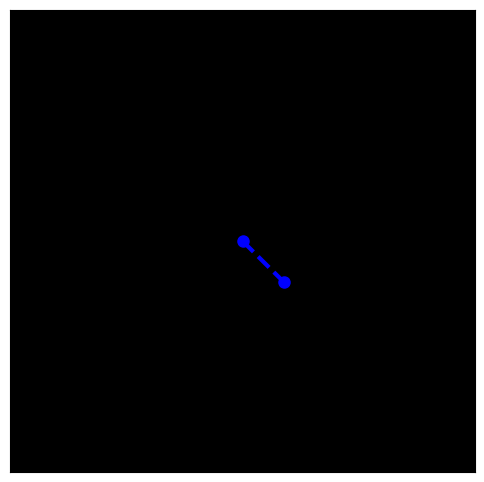

In [69]:
def animate6(i):
    ln1.set_data([0, x[i]], [0, y[i]])
    #ln1.set_data([0, x1[i]], [0, y1[i]])
    #ln2.set_data([x1[i], x[i]], [y1[i], y[i]])
    
fig, ax = plt.subplots(1,1, figsize=(6,6))
ax.set_facecolor('k')
ax.get_xaxis().set_ticks([])    # enable this to hide x axis ticks
ax.get_yaxis().set_ticks([])    # enable this to hide y axis ticks
ln1, = plt.plot([], [], 'bo--', lw=3, markersize=8)
#ln2, = plt.plot([], [], 'ro--', lw=3, markersize=8)
ax.set_ylim(-4,4)
ax.set_xlim(-4,4)
ani = animation.FuncAnimation(fig, animate6, frames=1000, interval=50)
ani.save('Ex6A.gif',writer='pillow',fps=25)